# Analysis of the effect of starting locations on angular error in HumanA
author: Nora Maleki (noora.maleki@gmail.com)
April 2022

In [101]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf

import scipy.stats as stats
import researchpy as rp


In [102]:
colorblind_palette = ['#2d004b', '#5ab4ac', '#b2182b', '#8c510a','#4575b4','#8073ac']
sns.set_theme(font_scale=1, palette=colorblind_palette, style='darkgrid')

## Load data

In [103]:
FILE_PATH = r'../../data/01_main'
PLOT_PATH = f'{FILE_PATH}/plots/analysis/'

os.makedirs(os.path.dirname(PLOT_PATH), exist_ok=True)

In [104]:
df_cleaned = pd.read_csv(f'{FILE_PATH}/07_preprocessed.csv')
df_cleaned.head()

,subject_id,body_pos_x,body_pos_z,pointer_pos_x,pointer_pos_z,pointer_dir_x,pointer_dir_z,building_center_z,building_center_x,human_agent,...,moved_target_position_z,target_to_x_180,dir_to_x_180,target_to_x_360,dir_to_x_360,final_180_angles,final_360_angles,rounded_180_angles,rounded_360_angles,absolute_180_angles
0,365,-114.329147,-139.997375,-114.236984,-139.696228,-0.055459,0.989548,53.288437,-72.578285,46,...,193.285812,77.811048,93.207763,77.811048,93.207763,15.396716,15.396716,15.0,15.0,15.396716
1,365,-65.669235,-159.945099,-65.474716,-159.710205,0.072550,0.992235,53.288437,-72.578285,46,...,213.233536,91.855810,85.818077,91.855810,85.818077,-6.037733,353.962267,-6.0,354.0,6.037733
2,365,38.849380,53.547638,38.471634,53.516281,-0.993265,-0.112792,53.288437,-72.578285,46,...,-0.259201,-179.866720,-173.521430,180.133280,186.478570,6.345290,6.345290,6.0,6.0,6.345290
3,365,38.880081,53.564148,38.700195,53.581047,-0.995648,-0.065598,53.288437,-72.578285,46,...,-0.275711,-179.858270,-176.230517,180.141730,183.769483,3.627752,3.627752,4.0,4.0,3.627752
4,365,110.754181,196.522675,110.428146,196.550751,-0.941145,-0.321944,53.288437,-72.578285,46,...,-143.234238,-142.000152,-161.115388,217.999848,198.884612,-19.115237,340.884763,-19.0,341.0,19.115237


## Linear Mixed Effects Models

In [105]:
lmm_df = (df_cleaned[['absolute_180_angles', 'RT', 'distance_to_target']]
           .assign(subject_id=df_cleaned.subject_id.astype('category'),
                   starting_loc_id=df_cleaned.starting_loc_id.astype('category'),
                   human_agent=df_cleaned.human_agent.astype('category'),
                   trial_id_per_location=df_cleaned.trial_id_per_location.astype('category')
                   ))

lmm_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7708 entries, 0 to 7707
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   absolute_180_angles    7708 non-null   float64 
 1   RT                     7708 non-null   float64 
 2   distance_to_target     7708 non-null   float64 
 3   subject_id             7708 non-null   category
 4   starting_loc_id        7708 non-null   category
 5   human_agent            7708 non-null   category
 6   trial_id_per_location  7708 non-null   category
dtypes: category(4), float64(3)
memory usage: 215.8 KB


In [106]:
N = lmm_df.subject_id.nunique()
N

23

In [107]:
rp.codebook(lmm_df)

Variable: absolute_180_angles    Data Type: float64 

 Number of Obs.: 7708 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 7708 

 Range: [0.0098611111833122, 179.98338618386344] 
 Mean: 48.08 
 Standard Deviation: 44.3 
 Mode: 0.0098611111833122 
 10th Percentile: 4.061728074435263 
 25th Percentile: 12.864763109725658 
 50th Percentile: 33.697730978897454 
 75th Percentile: 71.5482171723512 
 90th Percentile: 117.0012642321176 





Variable: RT    Data Type: float64 

 Number of Obs.: 7708 
 Number of missing obs.: 0 
 Percent missing: 0.0 
 Number of unique values: 7684 

 Range: [0.955792665481567, 29.289794206619263] 
 Mean: 7.77 
 Standard Deviation: 5.56 
 Mode: 1.3769052028656 
 10th Percentile: 2.431258296966553 
 25th Percentile: 3.621542990207672 
 50th Percentile: 6.063600659370422 
 75th Percentile: 10.153734385967253 
 90th Percentile: 15.809007906913761 





Variable: distance_to_target    Data Type: float64 

 Number of Obs.: 7708 
 Numb

In [108]:
rp.summary_cont(lmm_df.groupby(['starting_loc_id',])['absolute_180_angles'])

,N,Mean,SD,SE,95% Conf.,Interval
starting_loc_id,,,,,,
1,276,46.7310,41.6004,2.5041,41.8014,51.6605
2,276,33.5257,30.9483,1.8629,29.8584,37.1930
4,276,45.7968,43.7805,2.6353,40.6089,50.9846
5,276,62.7748,51.2321,3.0838,56.7040,68.8457
7,274,38.7264,39.5038,2.3865,34.0281,43.4247
9,276,27.5027,26.7153,1.6081,24.3370,30.6684
14,276,41.3706,40.0602,2.4113,36.6236,46.1176
18,274,51.9744,48.8015,2.9482,46.1703,57.7786
19,276,43.0256,42.7547,2.5735,37.9593,48.0920


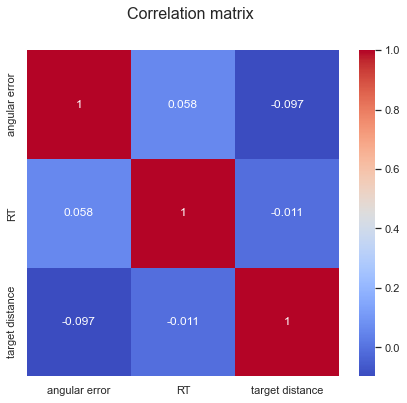

In [109]:
fig, axes = plt.subplots(figsize = (7, 6))

sns.heatmap(
    data=(lmm_df
          .rename(columns={'absolute_180_angles' : 'angular error',
                           'distance_to_target' : 'target distance'})
          .corr()),
    annot = True,
    fmt='.2g',
    cmap= 'coolwarm'
)

plt.suptitle(t='Correlation matrix', size=16, x=.45)

plt.show()

fig.savefig(f'{PLOT_PATH}/correlation_matrix_{N}.png', bbox_inches='tight', dpi=90)

### Predicting `angular error` based on `starting location`

In [110]:
formula = 'np.log(absolute_180_angles) ~ C(starting_loc_id, Treatment(reference=27)) + C(human_agent) + C(starting_loc_id, Treatment(reference=27)):C(human_agent)'

model_LM = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM.summary())

MemoryError: Unable to allocate 18.8 MiB for an array with shape (1569, 1569) and data type float64

In [95]:
formula = 'np.log(absolute_180_angles) ~ C(starting_loc_id, Treatment(reference=27))'

model_LM = smf.mixedlm(formula = formula, data = lmm_df, groups='subject_id').fit()
print(model_LM.summary())

                           Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       np.log(absolute_180_angles)
No. Observations:        7708          Method:                   REML                       
No. Groups:              23            Scale:                    1.7064                     
Min. group size:         329           Log-Likelihood:           -13067.5123                
Max. group size:         336           Converged:                Yes                        
Mean group size:         335.1                                                              
--------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                          3.580    0.118 30.384 0.000  3.349  3.811
C(sta

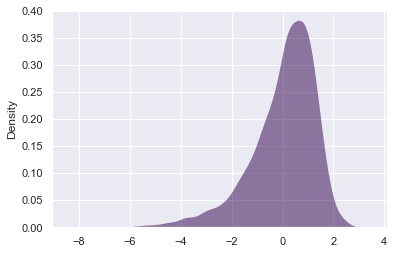

In [53]:
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
plt.show()

### Predicting `angular error` based on `starting location` and `distance to target`

In [54]:
formula = 'np.log(absolute_180_angles) ~ C(starting_loc_id, Treatment(reference=27)) + distance_to_target'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = lmer_df, groups='subject_id').fit()
print(model_LM.summary())

                           Mixed Linear Model Regression Results
Model:                   MixedLM       Dependent Variable:       np.log(absolute_180_angles)
No. Observations:        7708          Method:                   REML                       
No. Groups:              23            Scale:                    1.7065                     
Min. group size:         329           Log-Likelihood:           -13075.3181                
Max. group size:         336           Converged:                Yes                        
Mean group size:         335.1                                                              
--------------------------------------------------------------------------------------------
                                                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
--------------------------------------------------------------------------------------------
Intercept                                          3.558    0.121 29.472 0.000  3.321  3.795
C(sta

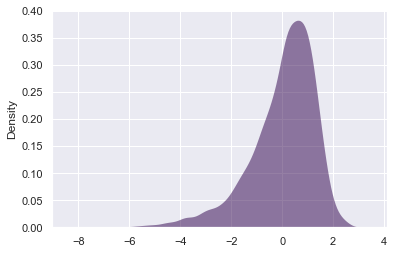

In [55]:
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
plt.show()

### Predicting `angular error` based on `distance to target`

In [56]:
formula = 'np.log(absolute_180_angles) ~ distance_to_target'

# Define and fit a linear regression model
model_LM = smf.mixedlm(formula = formula, data = lmer_df, groups=lmer_df['subject_id']).fit()
print(model_LM.summary())

                  Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: np.log(absolute_180_angles)
No. Observations: 7708    Method:             REML                       
No. Groups:       23      Scale:              1.7466                     
Min. group size:  329     Log-Likelihood:     -13135.9430                
Max. group size:  336     Converged:          Yes                        
Mean group size:  335.1                                                  
---------------------------------------------------------------------------
                       Coef.    Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------------------
Intercept               3.324      0.094   35.342   0.000    3.140    3.509
distance_to_target     -0.000      0.000   -2.302   0.021   -0.000   -0.000
Group Var               0.176      0.041                                   



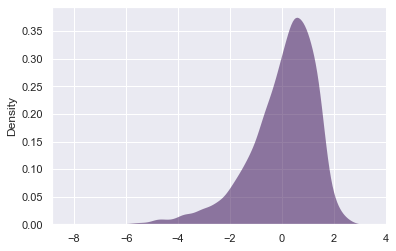

In [57]:
sns.kdeplot(model_LM.resid, shade='fill', palette='Crest', alpha=.5, linewidth=0)
plt.show()